In [3]:
import bilby
import numpy as np
import healpy as hp
import pandas as pd
import pylab
from astropy.table import Table
import astropy.cosmology as cosmo

name = 'HL1_full'
outdir = 'data/simlogs/'+name
bilby.core.utils.setup_logger(outdir=outdir)

In [4]:
run_data = pd.read_csv(outdir+'/sim_results.csv')

for key in run_data:
    if key == 'id':
        run_data[key] = name
    else:
        run_data[key] = float(run_data[key])

In [5]:
result = bilby.core.result.read_in_result(outdir+'/'+name+'-injection-uniform_result.json')

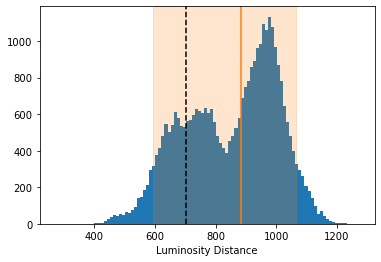

In [6]:
dl = result.posterior["luminosity_distance"].values

fig, ax = pylab.subplots()
ax.hist(dl, bins=100)
ax.axvspan(run_data['un_dl_lower'].values[0], run_data['un_dl_upper'].values[0], color='C1', alpha=0.2)
ax.axvline(run_data['un_dl_med'].values[0], color='C1')
ax.axvline(run_data['luminosity_distance'].values[0], color='k', linestyle='--')
ax.set_xlabel("Luminosity Distance")
pylab.show()

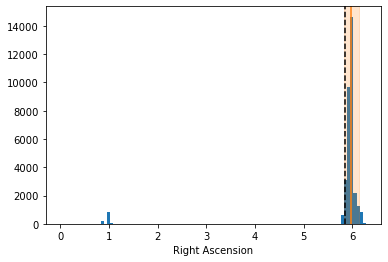

In [7]:
ra = result.posterior["ra"].values

fig, ax = pylab.subplots()
ax.hist(ra, bins=100)
ax.axvspan(run_data['un_ra_lower'].values[0], run_data['un_ra_upper'].values[0], color='C1', alpha=0.2)
ax.axvline(run_data['un_ra_med'].values[0], color='C1')
ax.axvline(run_data['ra'].values[0], color='k', linestyle='--')
ax.set_xlabel("Right Ascension")
pylab.show()

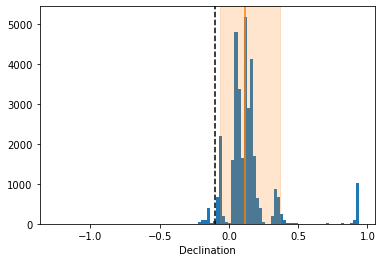

In [8]:
dec = result.posterior["dec"].values

fig, ax = pylab.subplots()
ax.hist(dec, bins=100)
ax.axvspan(run_data['un_dec_lower'].values[0], run_data['un_dec_upper'].values[0], color='C1', alpha=0.2)
ax.axvline(run_data['un_dec_med'].values[0], color='C1')
ax.axvline(run_data['dec'].values[0], color='k', linestyle='--')
ax.set_xlabel("Declination")
pylab.show()

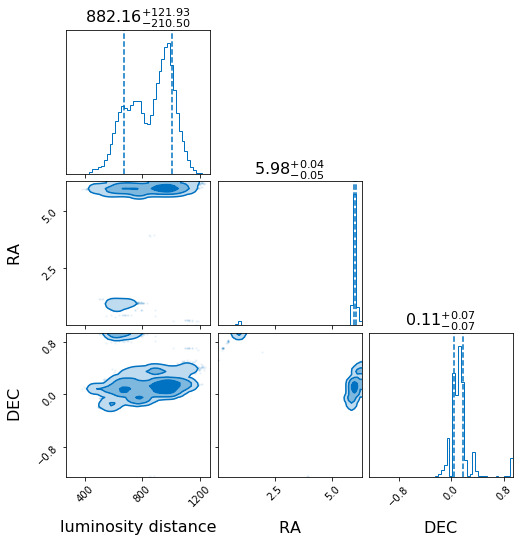

In [9]:
plot = result.plot_corner(parameters=["luminosity_distance", "ra", 'dec'], save=False)

In [10]:
result_hp = bilby.core.result.read_in_result(outdir+'/'+name+'-injection-healpix_result.json')

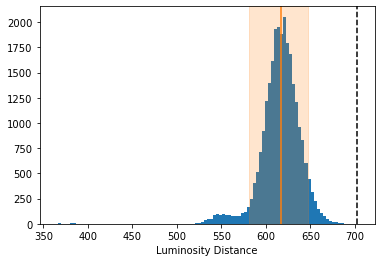

In [11]:
dl = result_hp.posterior["luminosity_distance"].values

fig, ax = pylab.subplots()
ax.hist(dl, bins=100)
ax.axvspan(run_data['hp_dl_lower'].values[0], run_data['hp_dl_upper'].values[0], color='C1', alpha=0.2)
ax.axvline(run_data['hp_dl_med'].values[0], color='C1')
ax.axvline(run_data['luminosity_distance'].values[0], color='k', linestyle='--')
ax.set_xlabel("Luminosity Distance")
pylab.show()

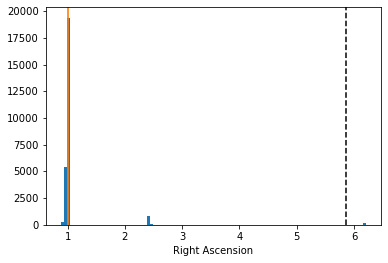

In [12]:
ra = result_hp.posterior["ra"].values

fig, ax = pylab.subplots()
ax.hist(ra, bins=100)
ax.axvspan(run_data['hp_ra_lower'].values[0], run_data['hp_ra_upper'].values[0], color='C1', alpha=0.2)
ax.axvline(run_data['hp_ra_med'].values[0], color='C1')
ax.axvline(run_data['ra'].values[0], color='k', linestyle='--')
ax.set_xlabel("Right Ascension")
pylab.show()

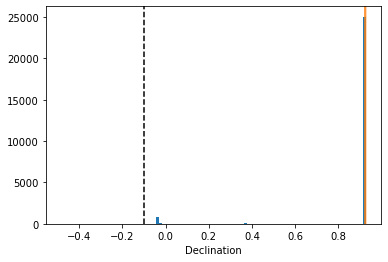

In [13]:
dec = result_hp.posterior["dec"].values

fig, ax = pylab.subplots()
ax.hist(dec, bins=100)
ax.axvspan(run_data['hp_dec_lower'].values[0], run_data['hp_dec_upper'].values[0], color='C1', alpha=0.2)
ax.axvline(run_data['hp_dec_med'].values[0], color='C1')
ax.axvline(run_data['dec'].values[0], color='k', linestyle='--')
ax.set_xlabel("Declination")
pylab.show()

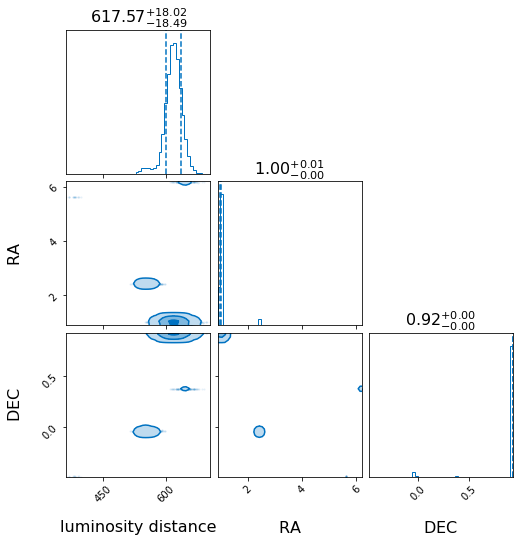

In [14]:
plot = result_hp.plot_corner(parameters=["luminosity_distance", "ra", 'dec'], save=False)

In [20]:
#pd.DataFrame(run_data).to_csv('data/sim_results.csv', mode='a', index=False, header=False)